In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

### Getting the whole set

In [2]:
df = pd.read_csv('./WDI_csv/WDIData.csv');

### GETTING THE COUNTRIES DATA TO FILTER THE UNWANTED REGIONS(ARAB WORLD, CARRIBBEAN SMALL STATES ETC)

In [3]:
countries_df = pd.read_csv('./WDI_csv/WDICountry.csv');
countries_df.dropna(subset=['Currency Unit' , '2-alpha code', 'WB-2 code'], inplace= True);
countries_df = countries_df[['Country Code', 'Table Name']]

### Function to get rid of unwanted countries

In [4]:
def df_by_indicator(indicator):
    return df[ (df['Indicator Code'] == indicator) & (df['Country Code'].isin(countries_df['Country Code']))]

### Joining GDP, GNI, Population Growth Table

In [5]:
df_pop = df_by_indicator('SP.POP.GROW')
df_pop.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_pop = pd.melt(df_pop,id_vars=['Country Name'], var_name="Year", value_name="PG")
df_pop.set_index(['Country Name', 'Year'], inplace=True)
df_pop.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,,PG
Country Name,Year,
Afghanistan,1960,1.816077
Albania,1960,3.015423
Algeria,1960,2.511434
American Samoa,1960,1.403903
Andorra,1960,7.050663


In [6]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
df_gni.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_gni = pd.melt(df_gni,id_vars=['Country Name'], var_name="Year", value_name="GNI")
df_gni.set_index(['Country Name', 'Year'], inplace=True)
df_gni.head()

,,GNI
Country Name,Year,
Afghanistan,1960,NaN
Albania,1960,NaN
Algeria,1960,NaN
American Samoa,1960,NaN
Andorra,1960,NaN


In [7]:
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')
df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 62'], axis=1,inplace=True)
df_gdp = pd.melt(df_gdp,id_vars=['Country Name'], var_name="Year", value_name="GDP")
df_gdp.set_index(['Country Name', 'Year'], inplace=True)
df_gdp.head()

,,GDP
Country Name,Year,
Afghanistan,1960,NaN
Albania,1960,NaN
Algeria,1960,NaN
American Samoa,1960,NaN
Andorra,1960,NaN


In [8]:
df_all = df_pop.join(df_gdp, how='inner').join(df_gni, how='inner')
df_all.index = df_all.index.rename(['Country', 'Year'])
df_all.head()

,,PG,GDP,GNI
Country,Year,,,
Afghanistan,1960,1.816077,NaN,NaN
Albania,1960,3.015423,NaN,NaN
Algeria,1960,2.511434,NaN,NaN
American Samoa,1960,1.403903,NaN,NaN
Andorra,1960,7.050663,NaN,NaN


## Categorizing Low and High Income Countries

In [9]:
LOW_INCOME_THRESHOLD = 1005
HIGH_INCOME_THRESHOLD = 12235

def country_names_by_gni_threshold(thresh, year='2017'):
    temp = df_all.reset_index()
    return temp[(temp['Year'] == year) & (temp['GNI'] < thresh)]['Country'].values

low_income_country_names = country_names_by_gni_threshold(LOW_INCOME_THRESHOLD)
high_income_country_names = country_names_by_gni_threshold(HIGH_INCOME_THRESHOLD)
print("Low Income Countries: ", low_income_country_names)
print("High Income Countries: ", high_income_country_names)

Low Income Countries:  ['Burundi' 'Central African Republic' 'Congo, Dem. Rep.' 'Liberia' 'Niger']
High Income Countries:  ['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Bangladesh' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Dominica' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Eswatini' 'Ethiopia' 'Fiji' 'Gambia, The' 'Georgia'
 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'India' 'Indonesia' 'Jamaica' 'Jordan' 'Kenya' 'Kiribati' 'Kosovo'
 'Kyrgyz Republic' 'Lao PDR' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi'
 'Mali' 'Marshall Islands' 'Mauritania' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar' 'Nepal' 'Nicaragua' 'Niger'
 'Nigeria' 'Pakistan' 'Papua New Guinea' 'Paraguay' 'Philippines' 'Rwanda'
 'Samoa' 'Sao Tome and Principe' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'St. Vin

# Overview of GNI on Low and High income countries

### Low Income

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


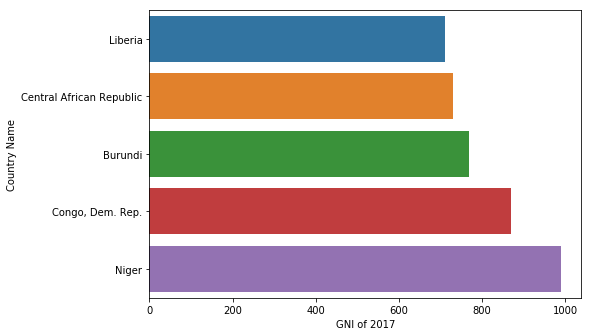

In [10]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
low_income_countries = df_gni[df_gni['2017'] < 1005]
high_income_countries = df_gni[df_gni['2017'] > 12235]

fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);

low_income_countries.sort_values(by='2017', ascending=1,inplace=True)
g = sns.barplot(x='2017',y='Country Name', data=low_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

### High Income

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


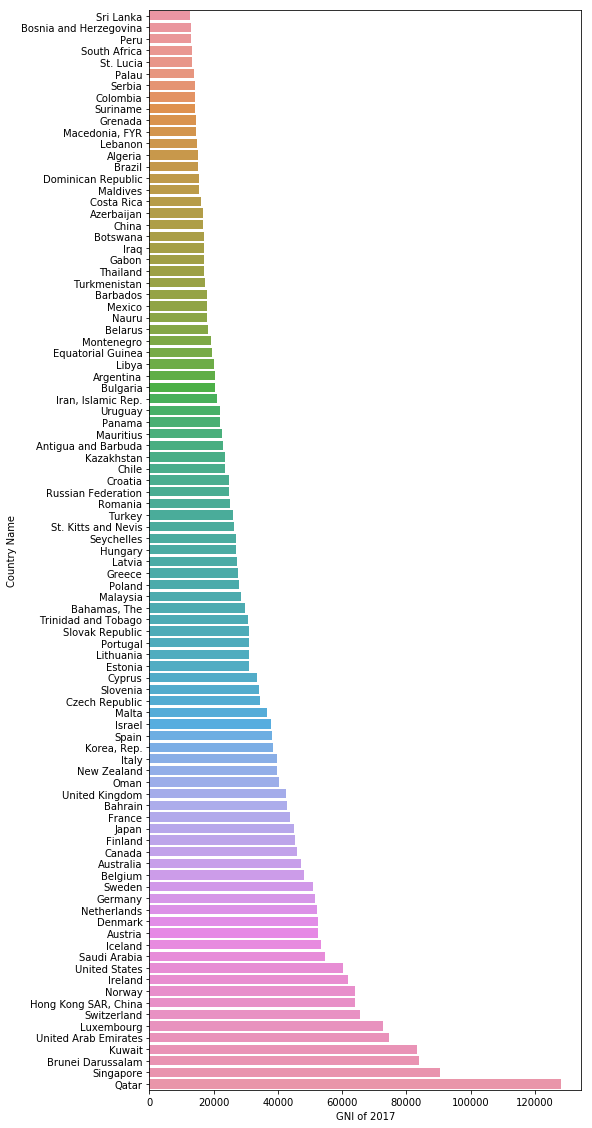

In [11]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);
fig.set_figheight(15);
high_income_countries.sort_values(by='2017', ascending=1,inplace=True)
g = sns.barplot(x='2017',y='Country Name', data=high_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

# Task 1: General Relation Population To GNI

## Regression Analysis

### Low Income

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


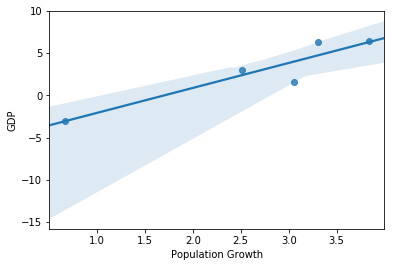

In [12]:
df_low_income = df_all.query('Country in @low_income_country_names')

mean_pop_growth = []
mean_gdp = []
for country in low_income_country_names:
    country_mean = df_low_income.xs(country)['2012':'2017'].mean()
    mean_pop_growth.append(country_mean['PG'])
    mean_gdp.append(country_mean['GDP'])
    
data = pd.DataFrame({
    'GDP': mean_gdp,
    'Population Growth': mean_pop_growth
})

sns.regplot(x="Population Growth", y="GDP", data=data)

### High Income

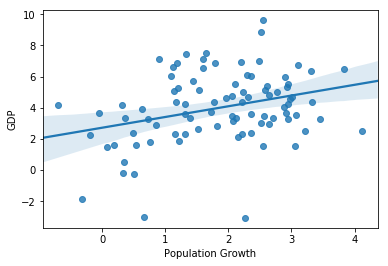

In [13]:
high_income_country_names = country_names_by_gni_threshold(HIGH_INCOME_THRESHOLD)
df_low_income = df_all.query('Country in @high_income_country_names')

mean_pop_growth = []
mean_gdp = []
for country in high_income_country_names:
    country_mean = df_low_income.xs(country)['2012':'2017'].mean()
    mean_pop_growth.append(country_mean['PG'])
    mean_gdp.append(country_mean['GDP'])
    
data = pd.DataFrame({
    'GDP': mean_gdp,
    'Population Growth': mean_pop_growth
})

sns.regplot(x="Population Growth", y="GDP", data=data)

## Correlation Analysis

In [14]:
tot_pop = df_by_indicator('SP.POP.TOTL')
df_pop = df_by_indicator('SP.POP.GROW')
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')

merged_data = pd.concat([df_pop, df_gdp], ignore_index=True)
merged_data = merged_data.set_index(['Country Name' , 'Indicator Code']).stack().unstack()

correlation = pd.DataFrame(np.repeat(-100, len(merged_data)/2), columns=['corr'])
correlation['corr'] = correlation['corr'].astype('float64');

### Listing all correlation for each country

In [15]:
temp = merged_data.drop(columns=['Country Code', 'Indicator Name'])
for i in np.arange(0, len(correlation) - 1): 
    correlation.loc[i, 'Country Name'] = temp.index.get_level_values(0)[2*i];
    correlation.loc[i, 'corr'] = temp.iloc[2*i: 2*i + 2].T.astype('float64').corr().iloc[(0,1)]
    
correlation = correlation[['Country Name','corr']]
correlation.head()


,Country Name,corr
0,Afghanistan,-0.092639
1,Albania,-0.098580
2,Algeria,0.076002
3,American Samoa,0.262554
4,Andorra,0.411949


### Getting all countries by various income levels

In [16]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
#taking the mean of GNI of last 5 years and categorizing it as low income , high income economy
conditions = [
    df_gni.loc[:,'2012':'2017'].mean(axis=1) < 1026,
    (df_gni.loc[:,'2012':'2017'].mean(axis=1) > 1026) & ( df_gni.loc[:,'2012':'2017'].mean(axis=1) < 4035),
    (df_gni.loc[:,'2012':'2017'].mean(axis=1) > 4036) & ( df_gni.loc[:,'2012':'2017'].mean(axis=1) < 12475),
    df_gni.loc[:,'2012':'2017'].mean(axis=1) > 12476]
choices = ['low income', 'lower middle-income', 'upper middle-income', 'high income']
df_gni['income_Level']  = np.select(conditions, choices)

income_levels = df_gni[['Country Name','income_Level']].reset_index().drop(columns=['index']);
correlation_table = pd.concat([correlation.set_index('Country Name'),income_levels.set_index('Country Name')], axis=1, join='inner').reset_index()

/usr/local/Cellar/ipython/7.0.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Selecting Countries with stronger correction i.e. corr > 0.5 or < -0.5

In [17]:
high_corr = correlation_table[(correlation_table['corr'] >= 0.5) | (correlation_table['corr'] <= -0.5)].sort_values('corr')
high_corr

,Country Name,corr,income_Level
17,Belarus,-0.689645,high income
60,Eritrea,-0.628179,0
87,Iceland,0.512940,high income
210,Virgin Islands (U.S.),0.515959,0
138,Netherlands,0.518132,high income
117,"Macedonia, FYR",0.520824,high income
180,St. Lucia,0.543923,high income
106,Kyrgyz Republic,0.564109,lower middle-income
32,Cabo Verde,0.572184,upper middle-income
97,Japan,0.581730,high income


## Task 1: Conclusion

As we can see from the regression plots that population growth has postive impact on economic growth of a country. In the correlation tables we can also see that only 2 countries that have negative correlation, namely: Belarus and Eritrea

# Task 2: Rapid Growth Analysis - Lower/High Income

In [18]:
merged_data2 = merged_data.reset_index()
merged_data2 = merged_data2[merged_data2['Country Name'].isin(high_corr.iloc[:]['Country Name'].tolist())].drop(columns=['Indicator Name', 'Country Code']);
merged_data2 = merged_data2.reset_index().drop(columns=['index'])
merged_data2 = merged_data2.melt(id_vars=['Country Name','Indicator Code'], var_name='year', value_name = 'percentage')

def show_plot_gdp_pop(country):
    fig = sns.scatterplot(data = merged_data2[merged_data2['Country Name'] == country] , x = 'year', y='percentage', hue="Indicator Code");
    plt.xticks(merged_data.columns[2::5]);
    plt.show(fig)

### Plot for all the countries who has high correlation except Liberia (because of some outliers in Libera we decided not to plot it with other countires as it was increasing the data scale too much)

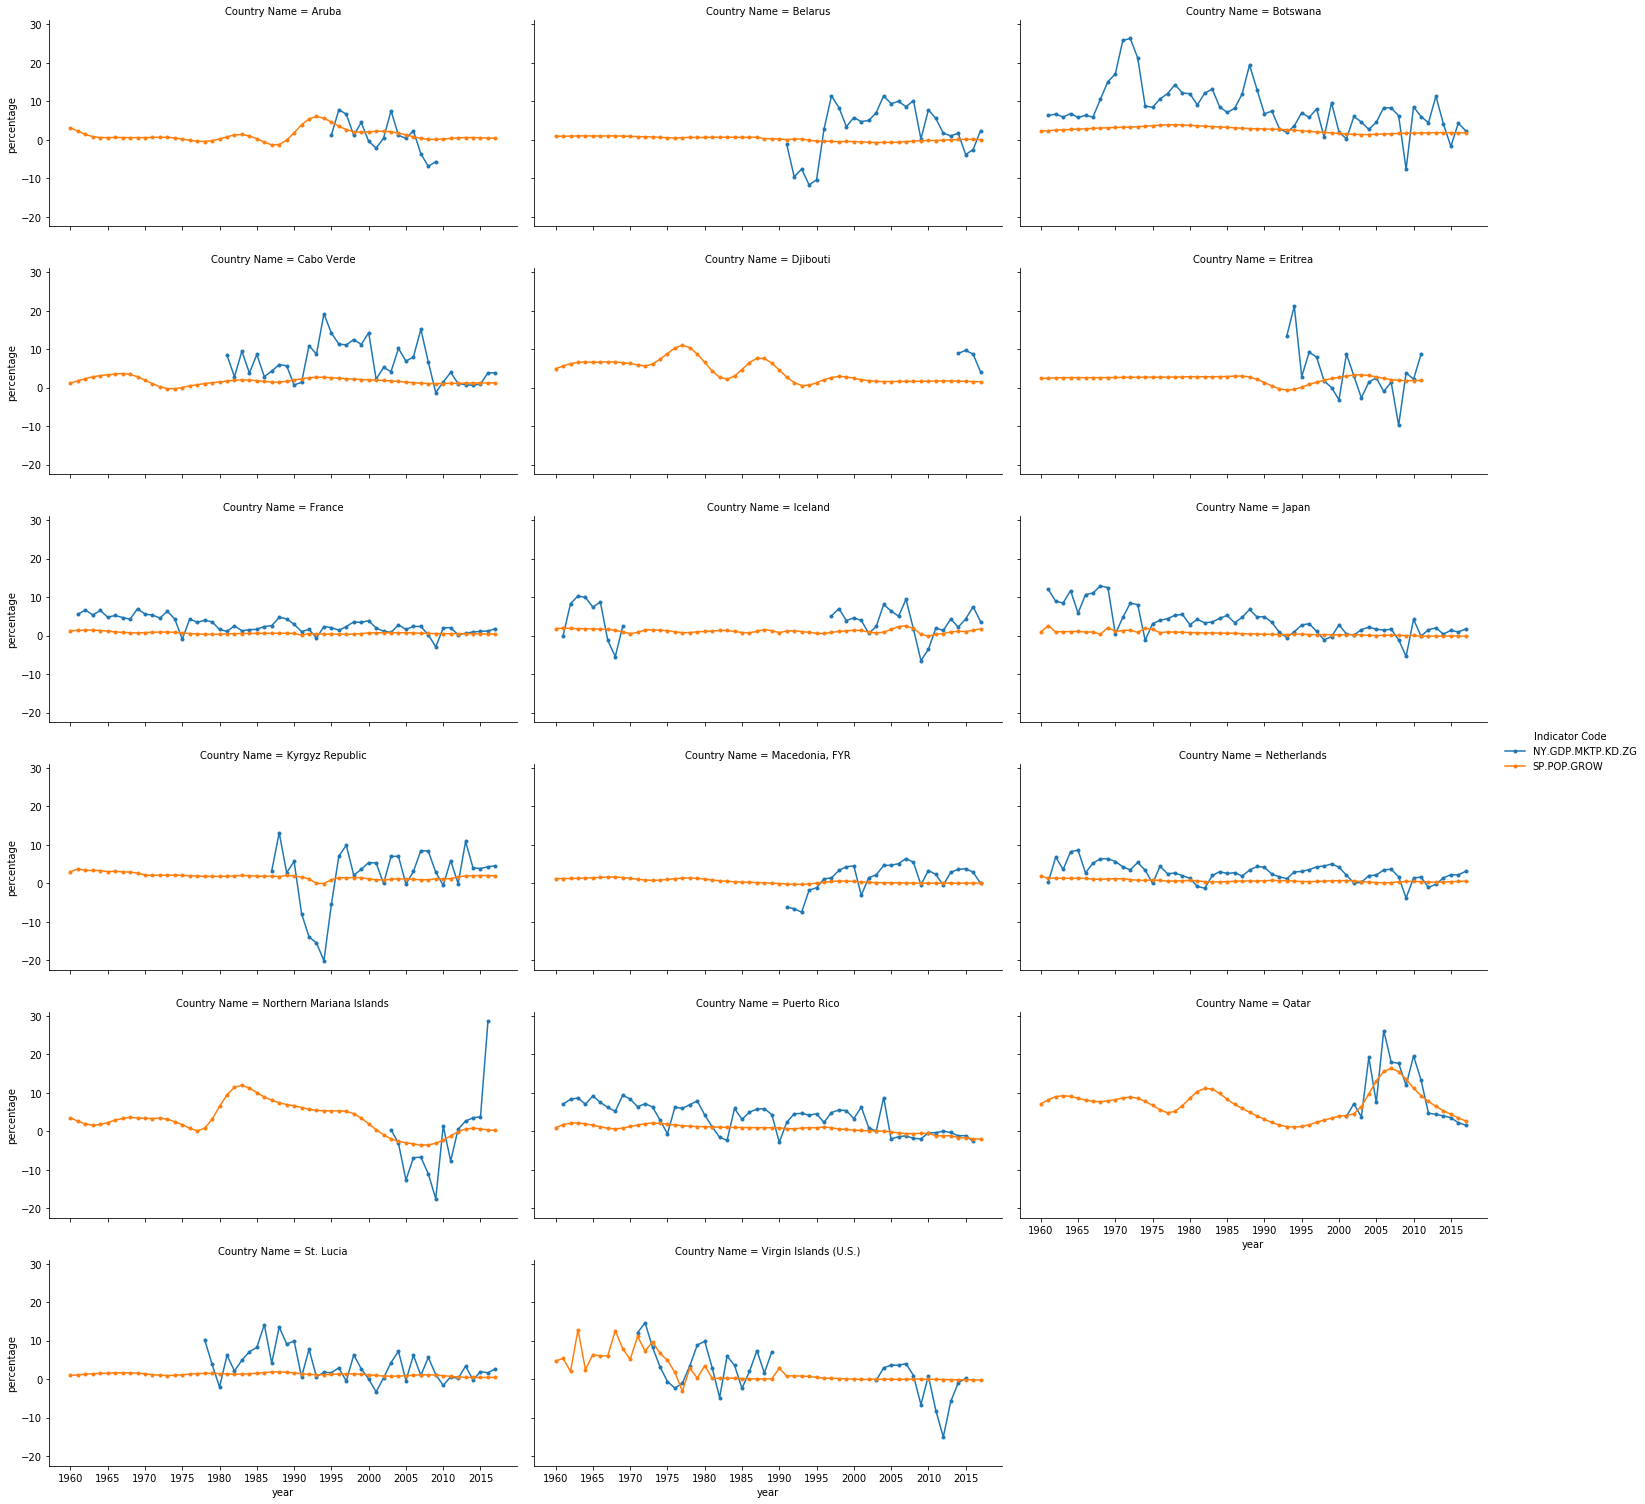

In [19]:
g = sns.FacetGrid(merged_data2[merged_data2['Country Name'] != 'Liberia'], col="Country Name", hue="Indicator Code",col_wrap=3, height=3.5, aspect=2, dropna=False)

g = g.map(plt.plot, "year", "percentage",marker=".").add_legend()
g.set(xticks=merged_data.columns[2::5])


## Liberia

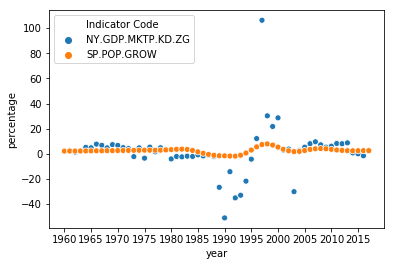

In [20]:
show_plot_gdp_pop('Liberia')

## Qatar

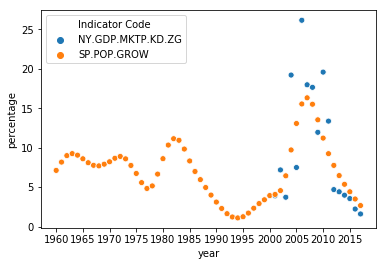

In [21]:
show_plot_gdp_pop('Qatar')

## Task 2: Conclusion

# Task 3: Per year Annual Population Growth in %

In [22]:
df_pop = df_by_indicator('SP.POP.GROW')
pop_growth=[]
Years = []
for i in range(1960,2018):
    pop_growth.append(df_pop[str(i)].sum() / 215)
    Years.append(i)


#Created two lists and then merging them and forming a table which has Years from 1960-2017 and their respective growth of population(%)

In [23]:
temp1 = pd.DataFrame(np.array(pop_growth))
temp2 = pd.DataFrame(np.array(Years))

frames = [temp2,temp1]

In [24]:
yearly_pop_g = pd.concat(frames,axis=1)
yearly_pop_g.columns = ['Year','Annual Population Growth (%)']
yearly_pop_g.head()

,Year,Annual Population Growth (%)
0,1960,2.289695
1,1961,2.289440
2,1962,2.306250
3,1963,2.349341
4,1964,2.286629


## Plot Linear Regression Population Growth

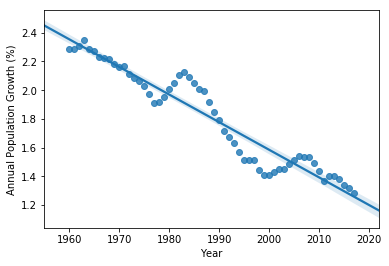

In [25]:
sns.regplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g);

## Create Linear Regression Model

In [26]:
X = yearly_pop_g[['Year']]
y = yearly_pop_g['Annual Population Growth (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_prediction = lm.predict(X_test)
RMSE = np.mean((y_test - y_prediction)**2);
#Root mean squared error of our linear model is 0.01.
RMSE 

0.010109880150349861

In [28]:
R2_training = lm.score(X_test, y_test);
R2_test = lm.score(X_train, y_train);
[R2_training ,R2_test]

[0.9044178049386156, 0.9241128257501415]

Since the R2 value of the LM on test set and training set is ~ 90% which explains that the linear model explains the variability in population well.

# Plotting the residuals

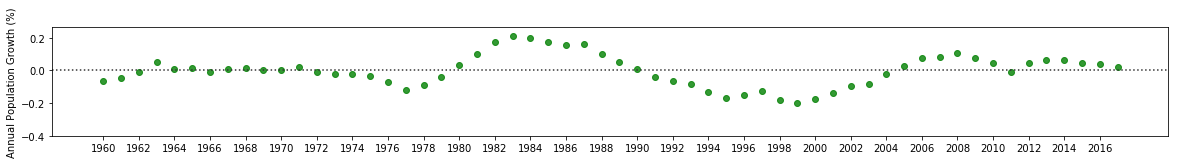

In [29]:

plt.figure(figsize=(20,2))
fig = sns.residplot(x=  X.values, y=(y - lm.predict(X)), color="g")
plt.xticks(X.values[0::2])
plt.yticks(np.arange(-0.4, 0.4, 0.2))
plt.show(fig)

## Residual Distribution

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


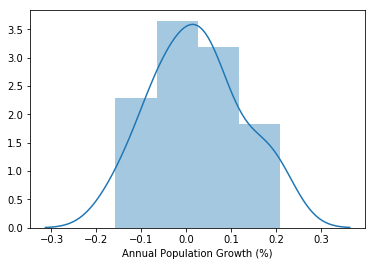

In [30]:
sns.distplot((y_test - y_prediction))


## Use model to predict up until year 2090 with 5 years interval

In [31]:
predict_years = np.arange(2020,2100)
prediction_pop_g = lm.predict(predict_years.reshape(-1,1))

predicted_df = pd.DataFrame({
    'Year': predict_years,
    'Predicted Pop Growth (%)': prediction_pop_g
})
predicted_df = predicted_df[predicted_df['Predicted Pop Growth (%)'] <0].reset_index();
predicted_df[2:3]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

,index,Year,Predicted Pop Growth (%)
2,65,2085,-0.047376


## Task 3: Conclusion

As per the linear regression model , the population growth will be zero 